In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [29]:
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,8))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

In [4]:
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

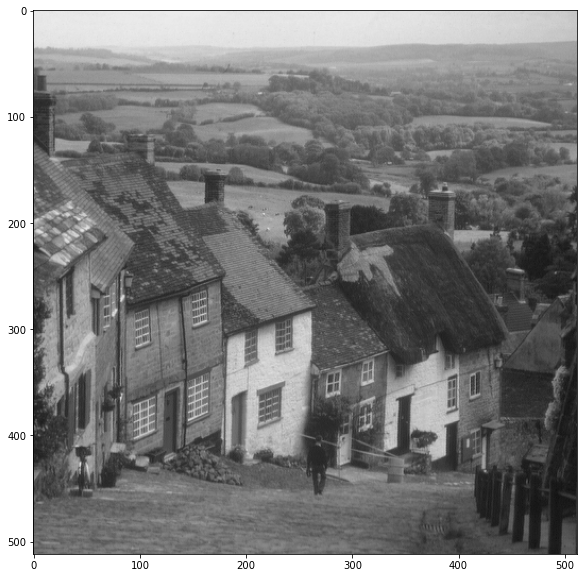

In [7]:
goldhill = cv2.imread("goldhill.png")#,cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(goldhill,cmap="gray")
plt.show()

In [16]:
hist = cv2.calcHist([goldhill],[0], None, [256], [0,255])
print(hist.shape)
print(hist.shape[0])

(256, 1)
256


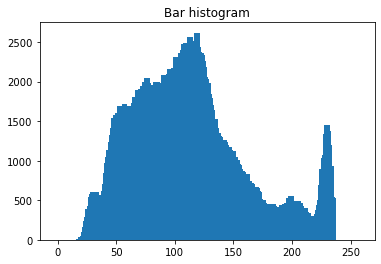

In [13]:
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)
plt.title("Bar histogram")
plt.show()

In [18]:
PDF = hist/(goldhill.shape[0]*goldhill.shape[1])
print(PDF)

[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [3.81469727e-06]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.14440918e-05]
 [1.14440918e-05]
 [3.05175781e-05]
 [5.34057617e-05]
 [1.29699707e-04]
 [1.94549561e-04]
 [3.81469727e-04]
 [6.06536865e-04]
 [8.96453857e-04]
 [1.07955933e-03]
 [1.48773193e-03]
 [1.64031982e-03]
 [2.06756592e-03]
 [2.20108032e-03]
 [2.31552124e-03]
 [2.32315063e-03]
 [2.23922729e-03]
 [2.29263306e-03]
 [2.05993652e-03]
 [1.95312500e-03]
 [1.92642212e-03]
 [2.13623047e-03]
 [2.16674805e-03]
 [2.37274170e-03]
 [2.68554688e-03]
 [3.23104858e-03]
 [3.68499756e-03]
 [3.99780273e-03]
 [4.32586670e-03]
 [4.71878052e-03]
 [5.03921509e-03]
 [5.40542603e-03]
 [5.86700439e-03]
 [5.85937500e-03]
 [6.03485107e-03]
 [6.10733032e-03]
 [6.01196289e-03]
 [6.44683838e-03]
 [6.29806519e-03]
 [6.374359

# Colour Image Histogram

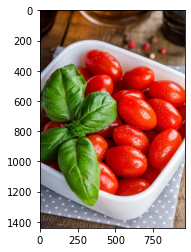

In [20]:
tomato = cv2.imread("tomato_color.png")
plt.imshow(cv2.cvtColor(tomato,cv2.COLOR_BGR2RGB))
plt.show()

color = ('blue','green','red')
for i,col in enumerate(color):
    histr = cv2.calcHist([tomato],[i],None,[256],[0,256])
    plt.plot(intensity_values,histr,color = col,label=col+" channel")
    
    plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()

# Image Negetive

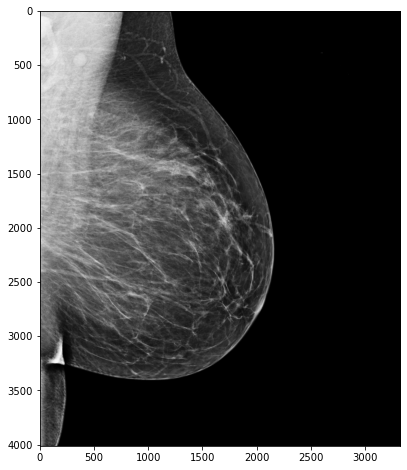

In [28]:
mammogram = cv2.imread('mammogram.jpg')
plt.figure(figsize=(10,8))
plt.imshow(mammogram)

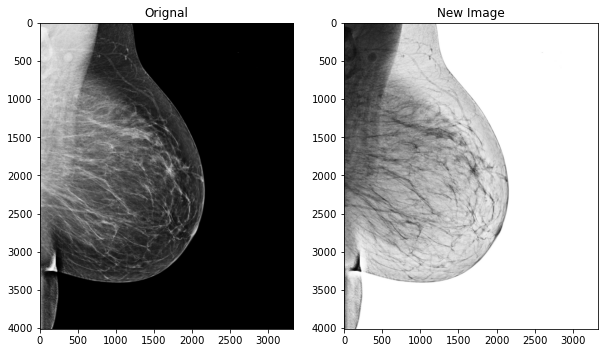

In [31]:
neg_mammogram = -1*mammogram + 255
plot_image(mammogram, neg_mammogram)

# Brightness and contrast adjustments

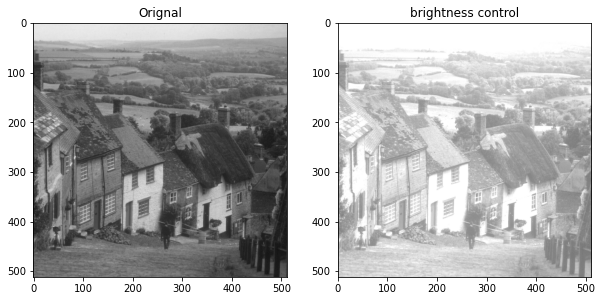

In [32]:
alpha = 1 # Simple contrast control
beta = 100   # Simple brightness control   
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)
plot_image(goldhill, new_image, title_1 = "Orignal", title_2 = "brightness control")

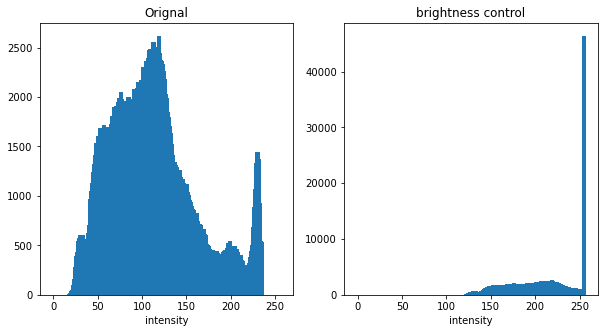

In [33]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Orignal", "brightness control")

In [34]:
plt.figure(figsize=(10,5))
alpha = 2# Simple contrast control
beta = 0 # Simple brightness control   # Simple brightness control
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

<Figure size 720x360 with 0 Axes>

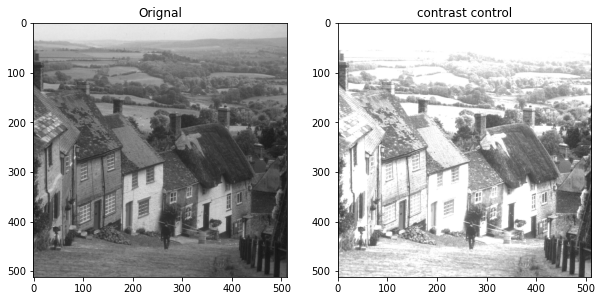

In [35]:
plot_image(goldhill,new_image,"Orignal","contrast control")

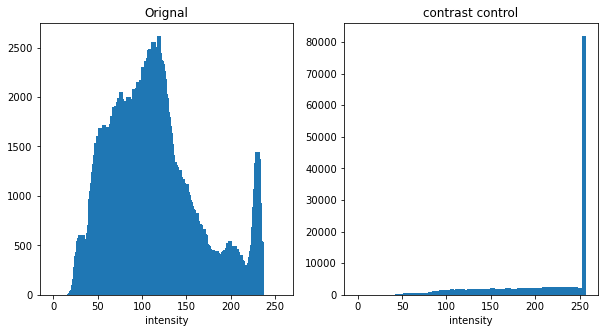

In [36]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image,"Orignal","contrast control")

In [37]:
alpha = 3 # Simple contrast control
beta = -200  # Simple brightness control   
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

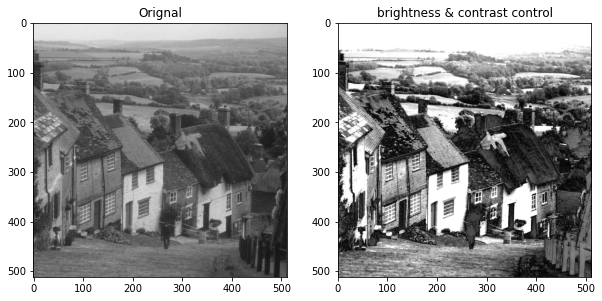

In [38]:
plot_image(goldhill, new_image, "Orignal", "brightness & contrast control")

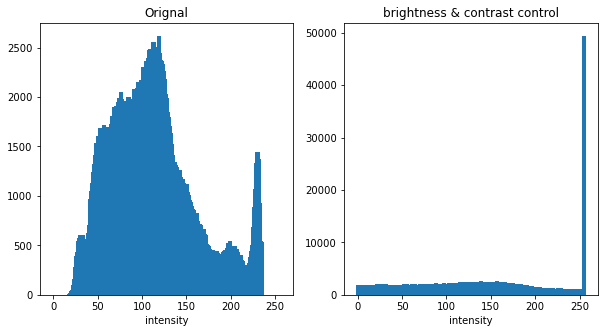

In [39]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Orignal", "brightness & contrast control")

# Thresholding and Simple Segmentation

In [40]:
def thresholding(input_img,threshold,max_value=255, min_value=0):
    N,M=input_img.shape
    image_out=np.zeros((N,M),dtype=np.uint8)
        
    for i  in range(N):
        for j in range(M):
            if input_img[i,j]> threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value
                
    return image_out

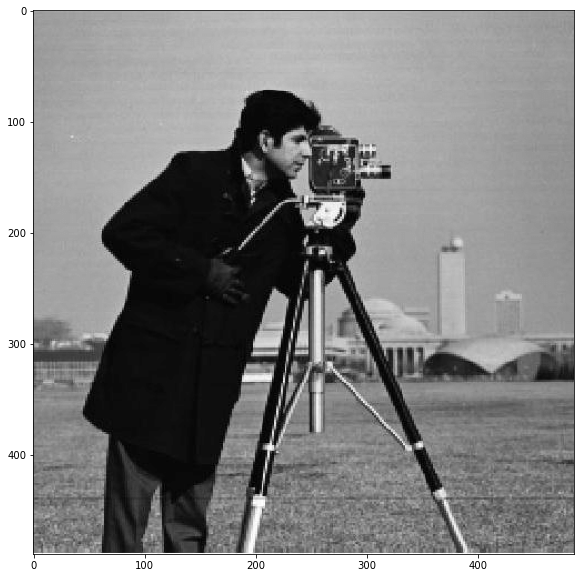

In [45]:
image = cv2.imread("cameraman.png", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap="gray")
plt.show()

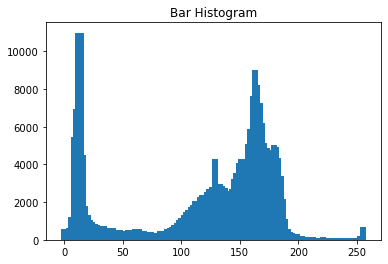

In [55]:
hist = cv2.calcHist([image], [0], None, [256], [0,256])
plt.bar(intensity_values, hist[:,0], width = 5)
plt.title('Bar Histogram')
plt.show()

In [56]:
new_image = thresholding(image,80)

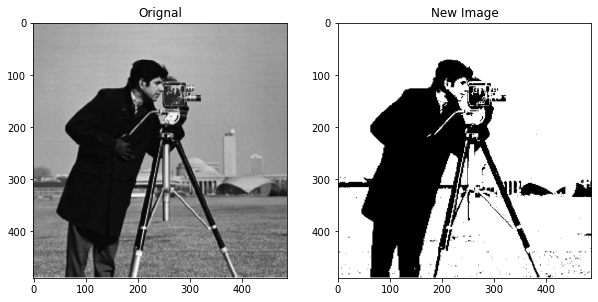

In [57]:
plot_image(image, new_image)

# Threshodig Method 2

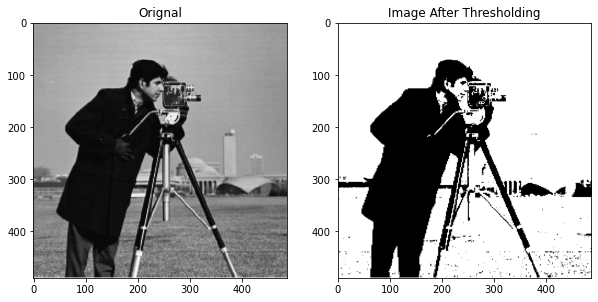

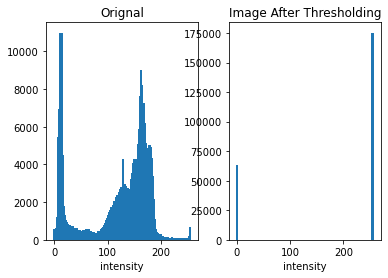

In [61]:
threshold = 87
max_value = 255
ret,new_image = cv2.threshold(image,threshold, max_value,cv2.THRESH_BINARY)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

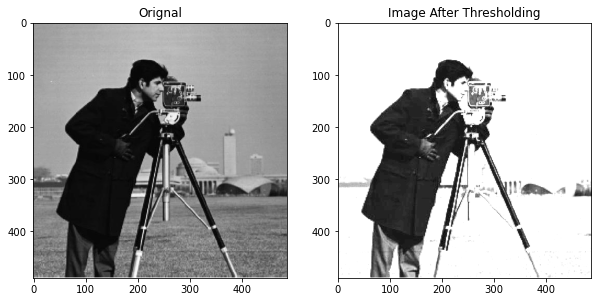

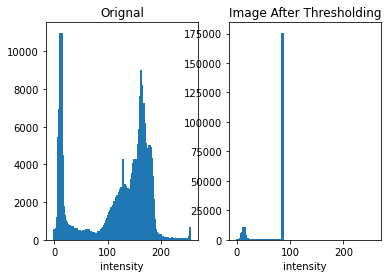

In [62]:
ret, new_image = cv2.threshold(image,86,255,cv2.THRESH_TRUNC) #cv2.THRESH_TRUNC will not change the values if the pixels are less than the threshold value
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

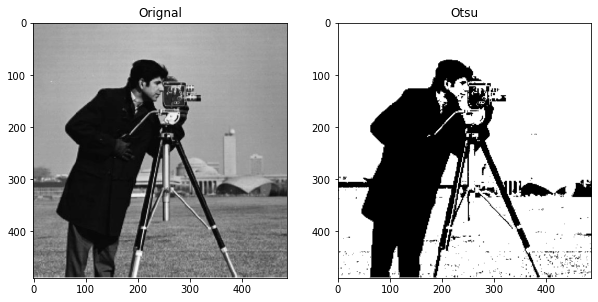

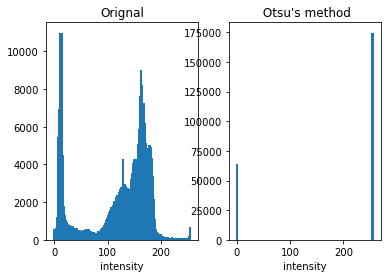

In [65]:
ret, otsu = cv2.threshold(image,0,255,cv2.THRESH_OTSU) #cv2.THRESH_OTSU avoids having to choose a value and determines it automatically, using the histogram.
plot_image(image,otsu,"Orignal","Otsu")
plot_hist(image, otsu,"Orignal"," Otsu's method")

In [66]:
ret

88.0